In [27]:
import pandas as pd
import numpy as np
import os.path
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
path = os.path.abspath("../data/03_modelling/dataset_reach.csv")

In [14]:
dataset=pd.read_csv(path,index_col=0)

# open a file, where you stored the pickled data
file = open('../data/03_modelling/dict.reaching_segments', 'rb')

# dump information to that file
reaching_seg = pickle.load(file)

# close the file
file.close()

In [16]:
##### Predicting
from sklearn.model_selection import train_test_split

#y = dataset['reach']
y = dataset['reach']
X = dataset.drop(['time_end','reach'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)

In [19]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

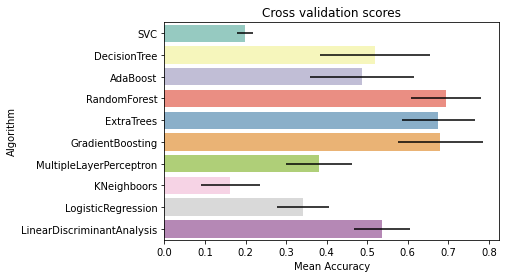

In [22]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4)) #scoring = 'accuracy'

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [23]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   30.9s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   46.0s remaining:    0.6s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   46.6s finished


0.7032467532467532

In [24]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   36.9s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   59.4s finished


0.7359307359307359

In [25]:
GBC = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [40,50,60],
              'learning_rate': [0.9,0.8,0.7],
              'max_depth': [0.5,1,2],
              'min_samples_leaf': [30,50,80],
              'max_features': [70,50,30] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   23.1s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1352 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1802 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 2352 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 2430 out of 2430 | elapsed:  3.4min finished


0.7132034632034632

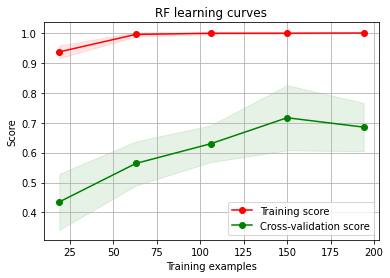

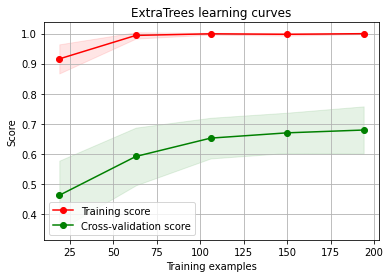

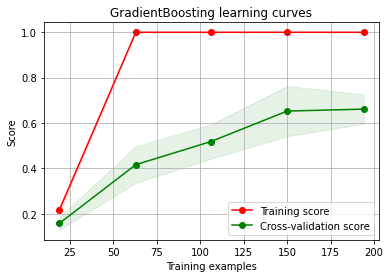

In [28]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

IndexError: list index out of range

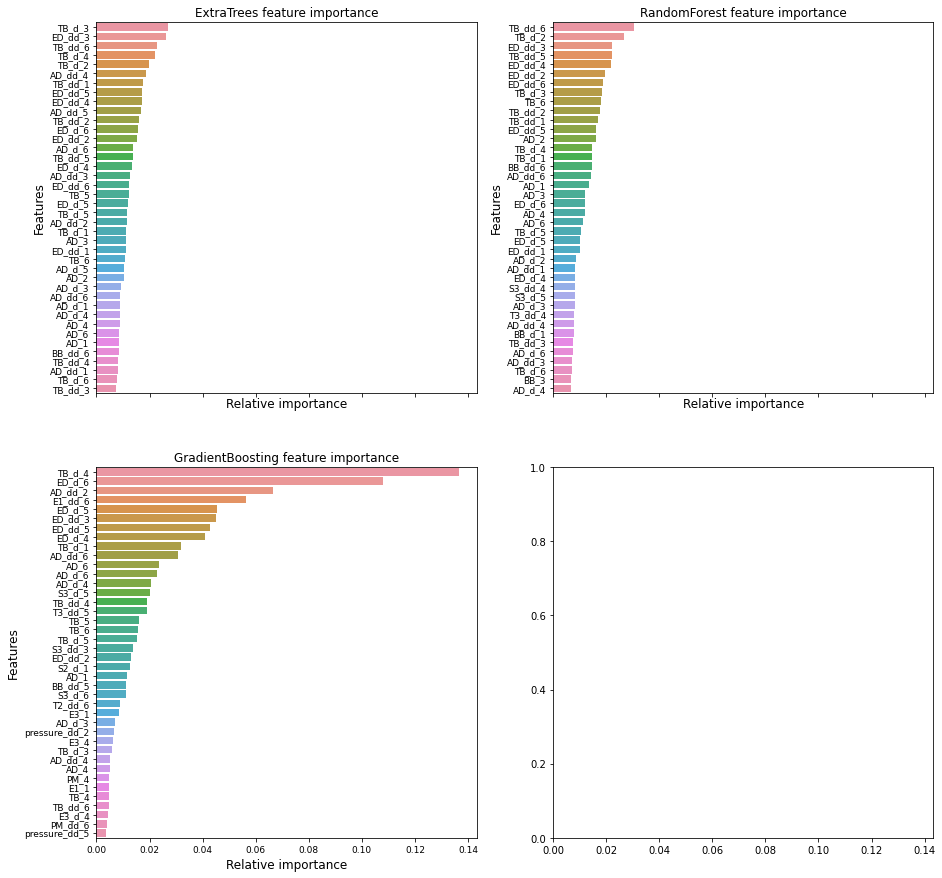

In [29]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

nrows = 2
names_classifiers = [("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

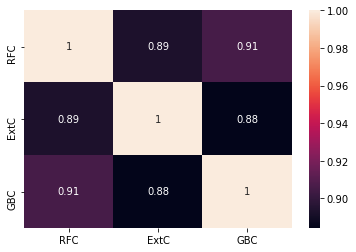

In [30]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
#test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
#test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_GBC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True) 

In [31]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc',ExtC_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [32]:
test = pd.Series(votingC.predict(X_test), name="reach")

#results = pd.concat([IDtest,test_Survived],axis=1)

#results.to_csv("ensemble_python_voting.csv",index=False)


In [33]:
cross_val_score(votingC, X_test, y = y_test, scoring = "accuracy", cv = kfold, n_jobs=4)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.66666667, 0.5       , 0.66666667, 0.66666667, 0.8       ,
       0.4       , 0.6       , 0.6       , 1.        , 0.6       ])

In [36]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

         2.0       0.60      0.67      0.63         9
         3.0       0.58      0.70      0.64        10
         4.0       0.50      0.14      0.22         7
         5.0       0.58      0.64      0.61        11
         6.0       0.44      0.44      0.44         9
         7.0       0.67      0.75      0.71         8

    accuracy                           0.57        54
   macro avg       0.56      0.56      0.54        54
weighted avg       0.56      0.57      0.55        54



In [38]:
y = dataset['time_end']
X = dataset.drop(['time_end','reach'],axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

   CrossValMeans  CrossValerrors                Algorithm
4       0.079642        0.013321               ExtraTrees
2       0.087066        0.022655                 AdaBoost
5       0.089086        0.019723         GradientBoosting
3       0.090563        0.016683             RandomForest
1       0.144456        0.035517             DecisionTree
0       0.205556        0.021053                      SVR
7       0.207930        0.018019               ElasticNet
8       0.210216        0.017396                    Lasso
9       0.238001        0.126639                    Ridge
6       0.727051        0.147194  MultipleLayerPerceptron


,CrossValMeans,CrossValerrors,Algorithm
4,0.079642,0.013321,ExtraTrees
2,0.087066,0.022655,AdaBoost
5,0.089086,0.019723,GradientBoosting
3,0.090563,0.016683,RandomForest
1,0.144456,0.035517,DecisionTree
0,0.205556,0.021053,SVR
7,0.207930,0.018019,ElasticNet
8,0.210216,0.017396,Lasso
9,0.238001,0.126639,Ridge
6,0.727051,0.147194,MultipleLayerPerceptron


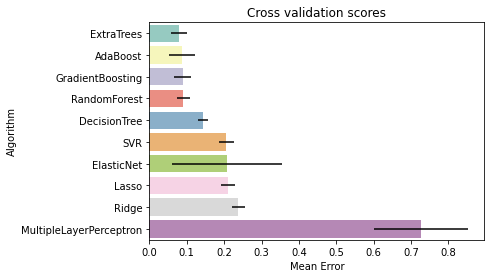

In [41]:
###### TIME PREDICTION


from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Ridge, ElasticNet, Lasso

baseline_regression_models(X_train,y_train,kfolds=10)

In [40]:
def baseline_regression_models(X_train, y_train, kfolds=0, n_jobs=1):
    
    classifiers = []
    classifiers.append(SVR())
    classifiers.append(DecisionTreeRegressor(random_state=42))
    classifiers.append(AdaBoostRegressor(DecisionTreeRegressor(random_state=42),random_state=42,learning_rate=0.1))
    classifiers.append(RandomForestRegressor(random_state=42))
    classifiers.append(ExtraTreesRegressor(random_state=42))
    classifiers.append(GradientBoostingRegressor(random_state=42))
    classifiers.append(MLPRegressor(random_state=42))
    classifiers.append(ElasticNet(random_state=42))
    classifiers.append(Lasso(random_state=42))
    classifiers.append(Ridge(random_state=42))
    
    if kfolds ==0:
        kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    cv_results = []
    for classifier in classifiers :
        cv_results.append(-cross_val_score(classifier, X_train, y_train, scoring = "neg_mean_absolute_error", cv = kfolds, n_jobs=n_jobs))
    
    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())
    
    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVR","DecisionTree","AdaBoost",
    "RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","ElasticNet","Lasso","Ridge"]})
    
    plt.figure()
    g = sns.barplot("CrossValMeans","Algorithm",data = cv_res.sort_values('CrossValMeans'), palette="Set3",orient = "h",**{'xerr':cv_std})
    g.set_xlabel("Mean Error")
    g = g.set_title("Cross validation scores")

    print(cv_res.sort_values('CrossValMeans'))
    return cv_res.sort_values('CrossValMeans')

In [42]:
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
GBR.predict(X_test),y_test

(array([1.97885208, 2.19436902, 2.02281007, 1.84708261, 2.2758988 ,
        2.41670169, 1.9807015 , 2.40302498, 2.31366484, 2.47498266,
        2.00240356, 2.26325504, 2.50508463, 2.242631  , 2.41403566,
        2.41509552, 2.59040361, 1.94677007, 2.28148027, 2.31214853,
        2.2661731 , 1.87461546, 2.08437396, 2.2135297 , 2.30577443,
        2.25836514, 2.33403213, 2.2953186 , 1.86175595, 2.4003818 ,
        2.22963505, 2.28838594, 1.83706973, 2.45035708, 2.28068212,
        2.4348025 , 1.945448  , 2.15707077, 2.40501477, 1.8475597 ,
        1.97075781, 1.86636456, 2.04893066, 1.97382271, 1.95290841,
        2.04824381, 2.42105305, 2.32539523, 2.49622794, 2.31539011,
        2.38864344, 2.56533406, 2.2884275 , 1.97491673]),
 30     1.842
 116    2.136
 79     1.932
 127    1.716
 196    2.292
 137    2.532
 209    1.938
 45     2.448
 158    2.268
 247    2.436
 183    2.106
 268    2.340
 227    2.520
 82     2.214
 165    2.436
 194    2.520
 226    2.640
 146    2.034
 104    2.